# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

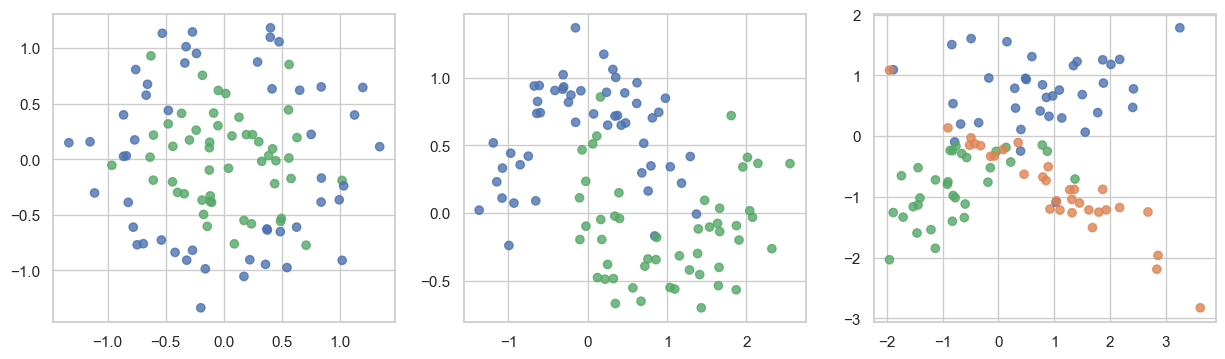

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

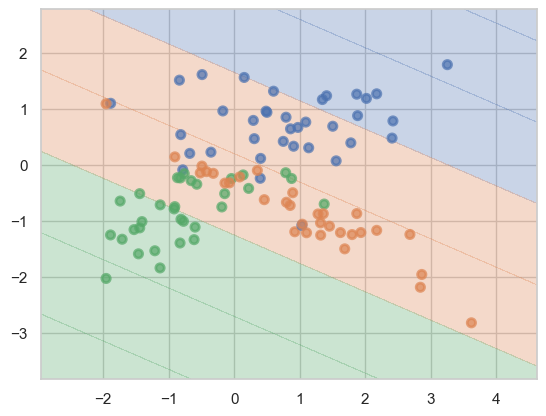

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy train =  1.0
Accuracy test =  0.8333333333333334


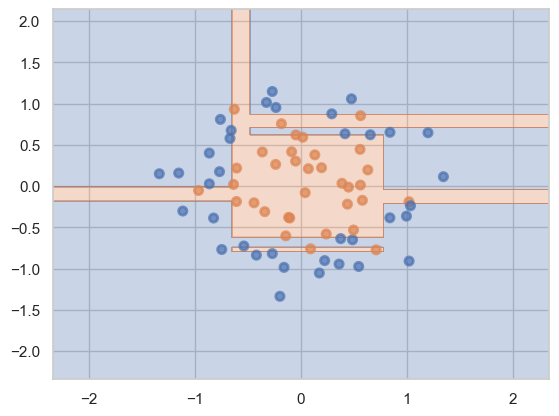

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
np.random.seed(15)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
clf = DecisionTreeClassifier().fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print('Accuracy train = ', accuracy_score(y_train, pred_train))
print('Accuracy test = ', accuracy_score(y_test, pred_test))
plot_surface(clf, X_train, y_train)

Accuracy train =  1.0
Accuracy test =  0.8


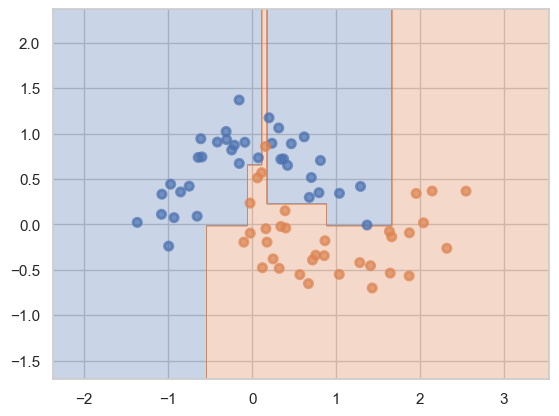

In [8]:
np.random.seed(15)
X, y = datasets[1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3)
clf1 = DecisionTreeClassifier().fit(X_train1, y_train1)
pred_train1 = clf1.predict(X_train1)
pred_test1 = clf1.predict(X_test1)
print('Accuracy train = ', accuracy_score(y_train1, pred_train1))
print('Accuracy test = ', accuracy_score(y_test1, pred_test1))
plot_surface(clf1, X_train1, y_train1)

Accuracy train =  1.0
Accuracy test =  0.7666666666666667


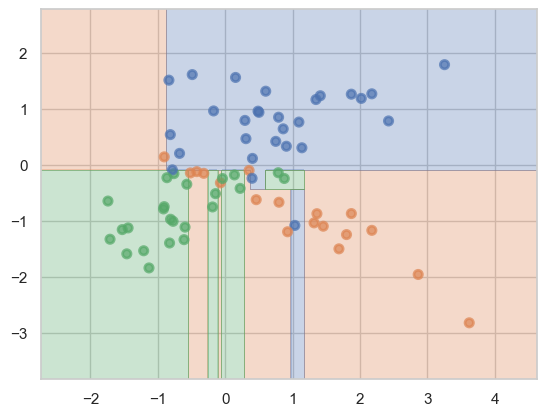

In [9]:
np.random.seed(15)
X, y = datasets[2]
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y, test_size = 0.3)
clf2 = DecisionTreeClassifier().fit(X_train2, y_train2)
pred_train2 = clf2.predict(X_train2)
pred_test2 = clf2.predict(X_test2)
print('Accuracy train = ', accuracy_score(y_train2, pred_train2))
print('Accuracy test = ', accuracy_score(y_test2, pred_test2))
plot_surface(clf2, X_train2, y_train2)

__Ответ:__

Мы видим, что качество значительно отличается на тестовой и обучающей выборках. Также значение accuracy для обучающих выборок равно 1. Это говорит о том, что дерево идеально подгоняется под обучающую выборку, то есть переобучается. На графиках мы также видим, что дерево строит поверхность так, чтобы правильно сделать предсказание на каждом объекте.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [10]:
#функция с семинара
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

max_depth =  2 , min_samples_leaf =  15 :
Accuracy train =  0.7428571428571429
Accuracy test =  0.7666666666666667

max_depth =  2 , min_samples_leaf =  5 :
Accuracy train =  0.7571428571428571
Accuracy test =  0.6666666666666666

max_depth =  2 , min_samples_leaf =  1 :
Accuracy train =  0.7571428571428571
Accuracy test =  0.6666666666666666

max_depth =  4 , min_samples_leaf =  15 :
Accuracy train =  0.7571428571428571
Accuracy test =  0.7333333333333333

max_depth =  4 , min_samples_leaf =  5 :
Accuracy train =  0.8857142857142857
Accuracy test =  0.8666666666666667

max_depth =  4 , min_samples_leaf =  1 :
Accuracy train =  0.9142857142857143
Accuracy test =  0.8333333333333334

max_depth =  6 , min_samples_leaf =  15 :
Accuracy train =  0.7571428571428571
Accuracy test =  0.7333333333333333

max_depth =  6 , min_samples_leaf =  5 :
Accuracy train =  0.9
Accuracy test =  0.9

max_depth =  6 , min_samples_leaf =  1 :
Accuracy train =  1.0
Accuracy test =  0.8333333333333334



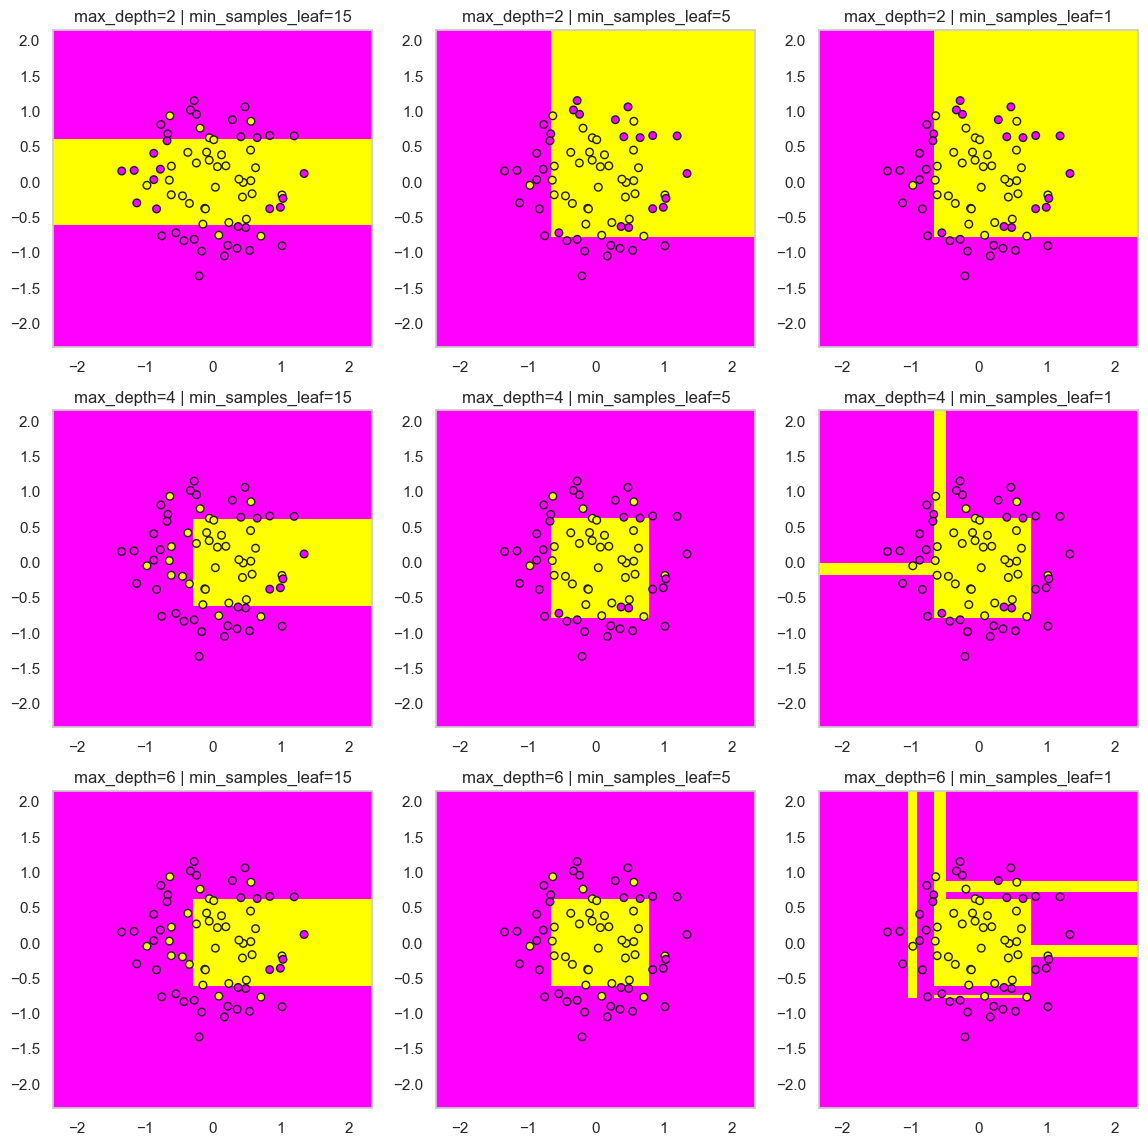

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.tree import DecisionTreeClassifier
np.random.seed(15)
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, 6]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train) #возьмем выборки из предыдущего задания
        xx, yy = get_grid(X_train)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        predicted_2 = clf.predict(X_train)
        predicted_1 = clf.predict(X_test)
        
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        print('max_depth = ', max_depth, ', min_samples_leaf = ', min_samples_leaf, ':')
        print('Accuracy train = ', accuracy_score(y_train, predicted_2))
        print('Accuracy test = ', accuracy_score(y_test, predicted_1))
        print('')

max_depth =  2 , min_samples_leaf =  15 :
Accuracy train =  0.8571428571428571
Accuracy test =  0.7666666666666667

max_depth =  2 , min_samples_leaf =  5 :
Accuracy train =  0.9
Accuracy test =  0.9

max_depth =  2 , min_samples_leaf =  1 :
Accuracy train =  0.9285714285714286
Accuracy test =  0.8333333333333334

max_depth =  4 , min_samples_leaf =  15 :
Accuracy train =  0.8571428571428571
Accuracy test =  0.7666666666666667

max_depth =  4 , min_samples_leaf =  5 :
Accuracy train =  0.9428571428571428
Accuracy test =  0.9

max_depth =  4 , min_samples_leaf =  1 :
Accuracy train =  0.9714285714285714
Accuracy test =  0.8333333333333334

max_depth =  6 , min_samples_leaf =  15 :
Accuracy train =  0.8571428571428571
Accuracy test =  0.7666666666666667

max_depth =  6 , min_samples_leaf =  5 :
Accuracy train =  0.9428571428571428
Accuracy test =  0.9

max_depth =  6 , min_samples_leaf =  1 :
Accuracy train =  1.0
Accuracy test =  0.8



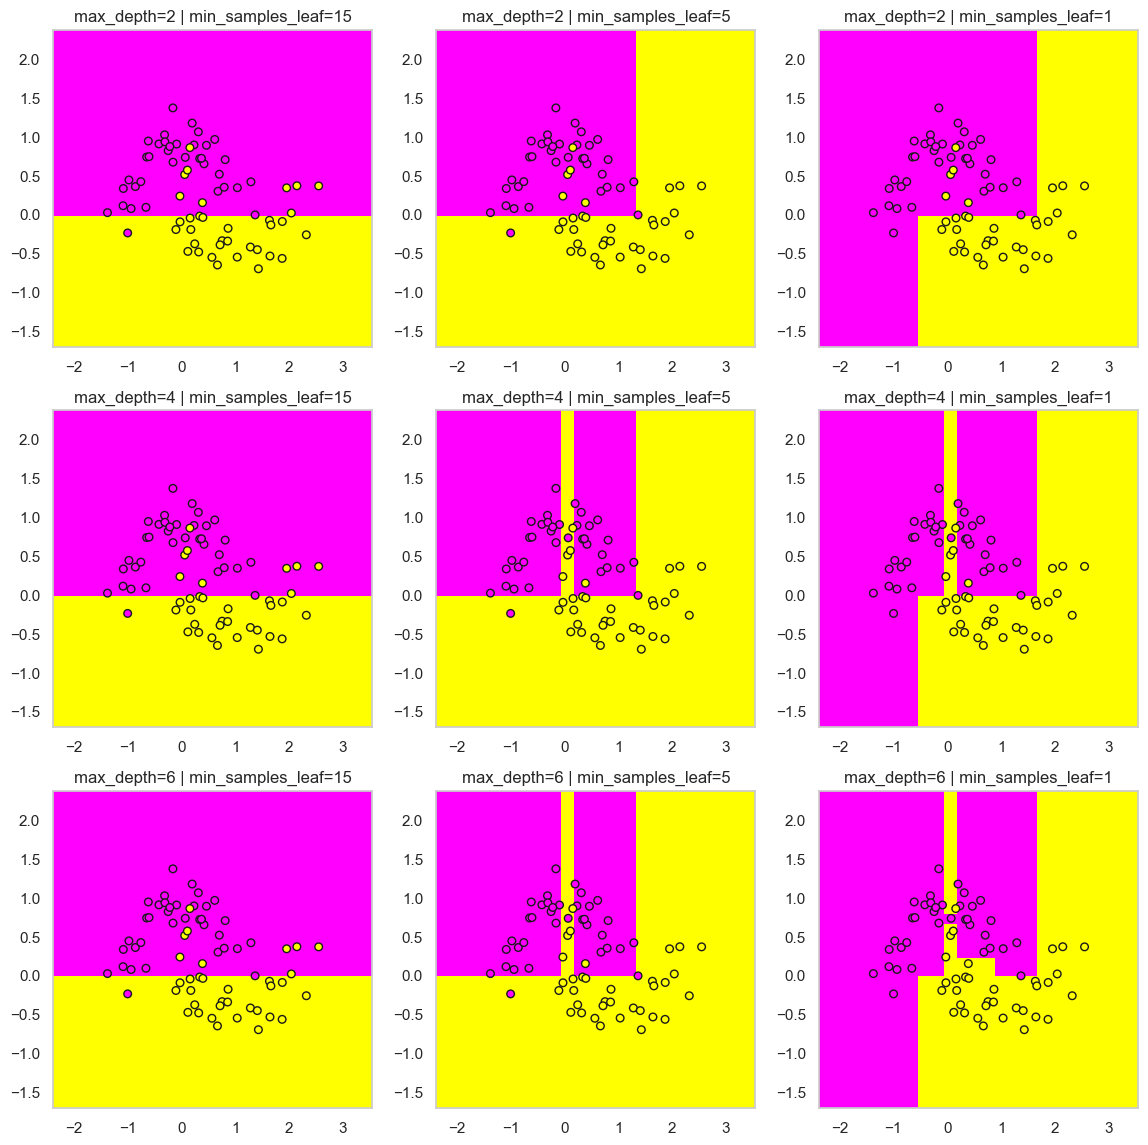

In [12]:
np.random.seed(15)
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, 6]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train1, y_train1) #возьмем выборки из предыдущего задания
        xx, yy = get_grid(X_train1)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        predicted_2 = clf.predict(X_train1)
        predicted_1 = clf.predict(X_test1)
        
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        print('max_depth = ', max_depth, ', min_samples_leaf = ', min_samples_leaf, ':')
        print('Accuracy train = ', accuracy_score(y_train1, predicted_2))
        print('Accuracy test = ', accuracy_score(y_test1, predicted_1))
        print('')

max_depth =  2 , min_samples_split =  15 :
Accuracy train =  0.8571428571428571
Accuracy test =  0.9

max_depth =  2 , min_samples_split =  5 :
Accuracy train =  0.8571428571428571
Accuracy test =  0.9

max_depth =  2 , min_samples_split =  1 :
Accuracy train =  0.8714285714285714
Accuracy test =  0.9

max_depth =  4 , min_samples_split =  15 :
Accuracy train =  0.8571428571428571
Accuracy test =  0.9

max_depth =  4 , min_samples_split =  5 :
Accuracy train =  0.8857142857142857
Accuracy test =  0.7

max_depth =  4 , min_samples_split =  1 :
Accuracy train =  0.9
Accuracy test =  0.7

max_depth =  6 , min_samples_split =  15 :
Accuracy train =  0.8571428571428571
Accuracy test =  0.9

max_depth =  6 , min_samples_split =  5 :
Accuracy train =  0.9142857142857143
Accuracy test =  0.8333333333333334

max_depth =  6 , min_samples_split =  1 :
Accuracy train =  0.9428571428571428
Accuracy test =  0.8333333333333334



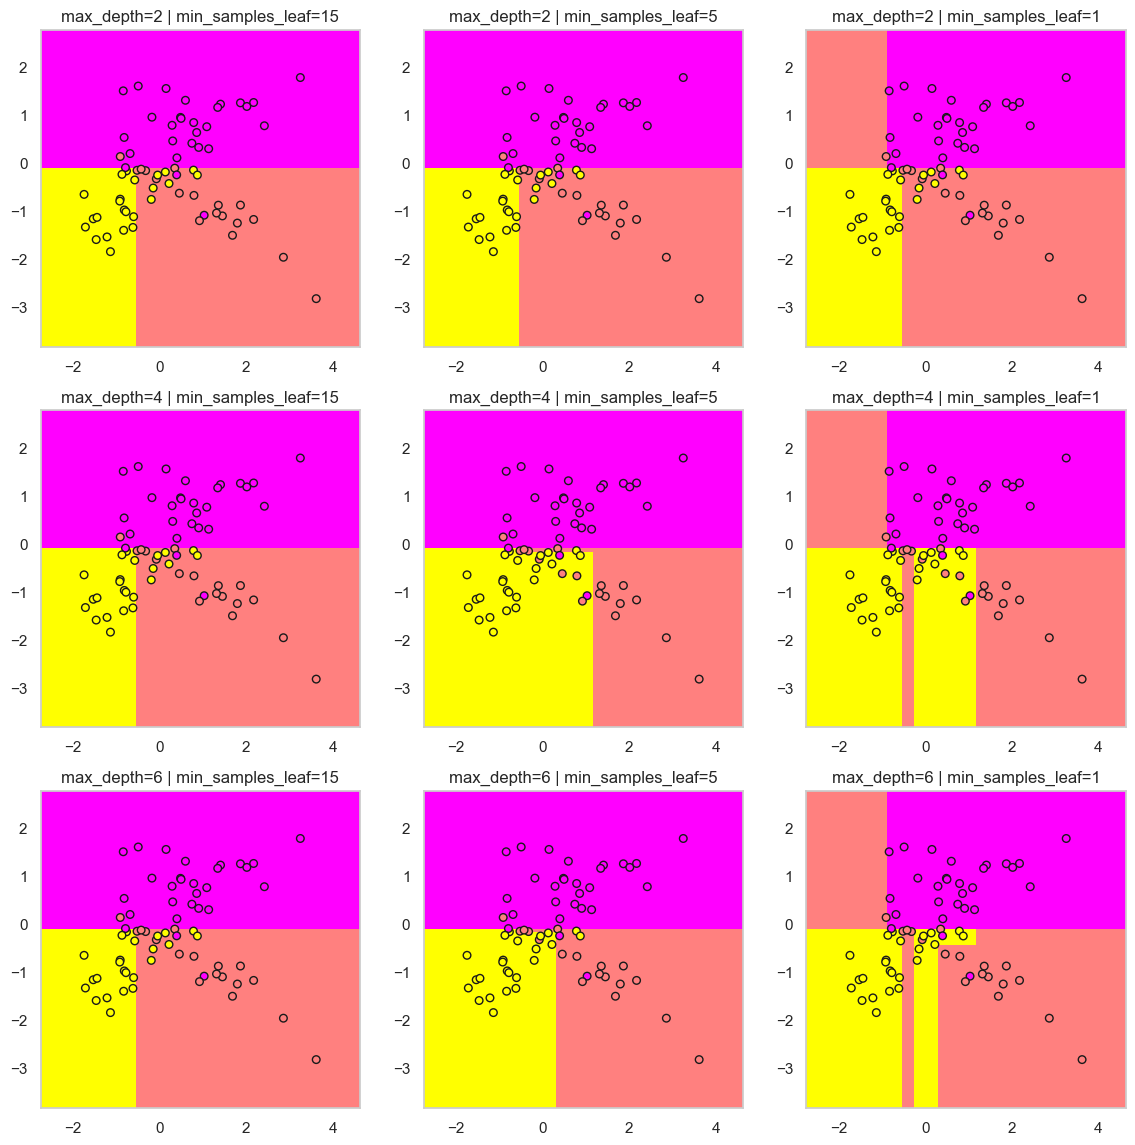

In [13]:
np.random.seed(15)
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, 6]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train2, y_train2) #возьмем выборки из предыдущего задания
        xx, yy = get_grid(X_train2)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        predicted_2 = clf.predict(X_train2)
        predicted_1 = clf.predict(X_test2)
        
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        print('max_depth = ', max_depth, ', min_samples_split = ', min_samples_leaf, ':')
        print('Accuracy train = ', accuracy_score(y_train2, predicted_2))
        print('Accuracy test = ', accuracy_score(y_test2, predicted_1))
        print('')

__Ответ:__

Мы видим для всех датасетов деревья с парметрами max_depth = 6, min_samples_leaf = 1 являются переобученными. Эти деревья идеально подгоняются под обучающую выборку, у них низкая обобщающая способность, это также можно заметить на гафиках. Для каждого датасета лучшие результаты на тесте были достигнуты при разных значениях параметров. Для первого - при max_depth = 6, min_samples_leaf = 5; для второго - при max_depth = 2 и min_samples_leaf = 5, max_depth = 4 и min_samples_leaf = 5, max_depth = 6 и min_samples_leaf = 5; для третьего - при max_depth = 2 и всех трех значениях min_samples_leaf, max_depth = 4 и min_samples_leaf = 15, max_depth = 6 и min_samples_leaf = 15. Можно заметить, что для каждого датасета свои лучшие параметры. Следовательно, нельзя однозначно выделить какие-то конкретные значения. Они зависят от выборки.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

источник кода - https://pastebin.com/pssBMQra

ссылка на контекст - https://contest.yandex.ru/contest/56884/run-report/102507681/

никнейм - erlegotkina@edu.hse.ru

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('students.csv')

In [15]:
import hw5code

In [16]:
from hw5code import find_best_split

In [17]:
STG = find_best_split(feature_vector = np.array(data['STG']), target_vector = data['UNS'])
SCG = find_best_split(feature_vector = np.array(data['SCG']), target_vector = data['UNS'])
STR = find_best_split(feature_vector = np.array(data['STR']), target_vector = data['UNS'])
LPR = find_best_split(feature_vector = np.array(data['LPR']), target_vector = data['UNS'])
PEG = find_best_split(feature_vector = np.array(data['PEG']), target_vector = data['UNS'])

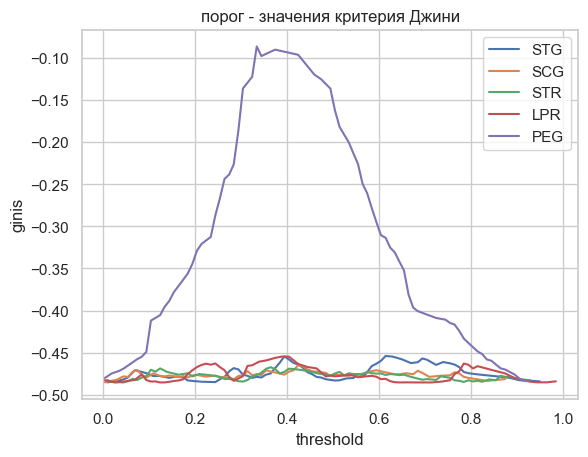

In [18]:
plt.plot(STG[0], STG[1], label = 'STG')
plt.plot(SCG[0], SCG[1], label = 'SCG')
plt.plot(STR[0], STR[1], label = 'STR')
plt.plot(LPR[0], LPR[1], label = 'LPR')
plt.plot(PEG[0], PEG[1], label = 'PEG')
plt.legend()
plt.title('порог - значения критерия Джини')
plt.xlabel("threshold")
plt.ylabel("ginis")
plt.show()

Text(0.5, 1.0, 'Диаграмма рассеяния UNS в зависимости от STG')

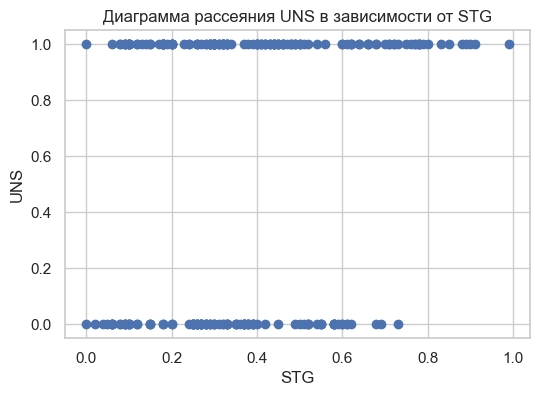

In [19]:
plt.figure(figsize = (6,4))
plt.scatter (data['STG'], data['UNS'])
plt.xlabel('STG')
plt.ylabel('UNS')
plt.title('Диаграмма рассеяния UNS в зависимости от STG')

Text(0.5, 1.0, 'Диаграмма рассеяния UNS в зависимости от SCG')

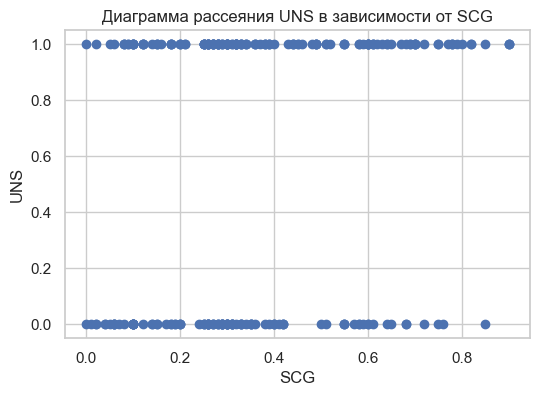

In [20]:
plt.figure(figsize = (6,4))
plt.scatter (data['SCG'], data['UNS'])
plt.xlabel('SCG')
plt.ylabel('UNS')
plt.title('Диаграмма рассеяния UNS в зависимости от SCG')

Text(0.5, 1.0, 'Диаграмма рассеяния UNS в зависимости от STR')

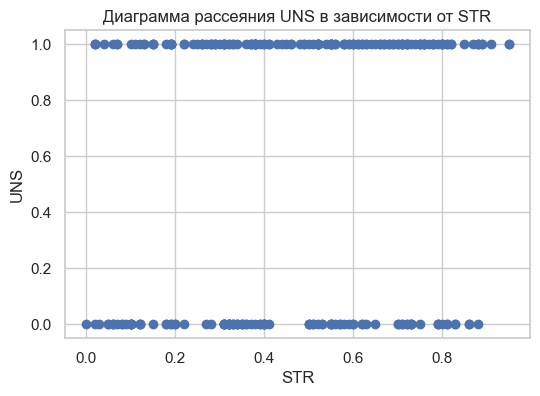

In [21]:
plt.figure(figsize = (6,4))
plt.scatter (data['STR'], data['UNS'])
plt.xlabel('STR')
plt.ylabel('UNS')
plt.title('Диаграмма рассеяния UNS в зависимости от STR')

Text(0.5, 1.0, 'Диаграмма рассеяния UNS в зависимости от LPR')

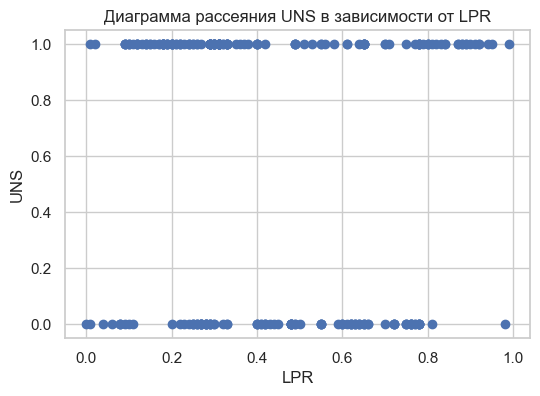

In [22]:
plt.figure(figsize = (6,4))
plt.scatter (data['LPR'], data['UNS'])
plt.xlabel('LPR')
plt.ylabel('UNS')
plt.title('Диаграмма рассеяния UNS в зависимости от LPR')

Text(0.5, 1.0, 'Диаграмма рассеяния UNS в зависимости от PEG')

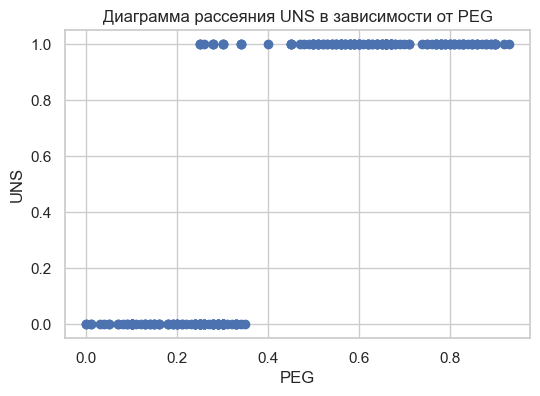

In [23]:
plt.figure(figsize = (6,4))
plt.scatter (data['PEG'], data['UNS'])
plt.xlabel('PEG')
plt.ylabel('UNS')
plt.title('Диаграмма рассеяния UNS в зависимости от PEG')

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Исходя из значений критерия Джини необходимо производить деление по признаку 'PEG'. Этот результат согласуется с визуальной оценкой диаграмм рессеяния. Мы видим, что для 'PEG' мы можем выделить практически четкие интервалы, в которых должны лежать значения для '0' и '1' классов. Для '0' - от 0 до примерно 3,7; для '1' - от 3,7 до 9,5. Если взять порог, который будет немного меньше 4, то мы допустим ошибку всего на 5-6 объектах. Значения остальных признаков для этих двух классов лежат практически в одном доверительном интервале. Вероятно, для хороших признаков кривая должна сначала возрастать, а потом убывать. Для признаков, по которым деление невозможно, кривые практически параллельны оси x, их графики то убывают, то возратают. 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

ссылка на контест - https://contest.yandex.ru/contest/56884/run-report/102716759/

никнейм - erlegotkina@edu.hse.ru

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [24]:
from hw5code import DecisionTree

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('agaricus-lepiota.data')

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
obj_cols = data.select_dtypes(include=[object])

for i in obj_cols:
    data[i] = le.fit_transform(data[i])
# e - 0, p - 1

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = 'p')
y = data['p']
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [28]:
feature = []
for i in range(23):
    feature.append('categorical')

In [29]:
dt = DecisionTree(np.array(feature))
dt.fit(np.array(X_train), np.array(y_train))
y_pr = dt.predict(np.array(X_test))
accuracy_score(y_test, y_pr)

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [30]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
columns_cars = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
columns_nurs = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
data_tic = pd.read_csv('tic-tac-toe-endgame.csv')
data_cars = pd.read_csv('car.data', names = columns_cars)
data_nurs = pd.read_csv('nursery.data', names = columns_nurs)

In [31]:
columns_tic = data_tic.columns.values.tolist ()
for i in columns_tic:
    data_tic[i] = le.fit_transform(data_tic[i])

X_tic = data_tic.drop(columns = 'V10')
y_tic = data_tic['V10']

In [32]:
mask = (data_cars['class'] == 'good') | (data_cars['class'] == 'vgood')
y_cars = np.where(mask, 1, 0)
X_cars = data_cars.drop(columns = 'class')
for i in columns_cars[0:-1]:
    X_cars[i] = le.fit_transform(X_cars[i])    

In [33]:
mask1 = (data_nurs['class'] == 'not_recom') | (data_nurs['class'] == 'recommend')
y_nurs = np.where(mask1, 0, 1)
X_nurs = data_nurs.drop(columns='class')
for i in columns_nurs[0:-1]:
    X_nurs[i] = le.fit_transform(X_nurs[i])

In [34]:
np.random.seed(1)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
feat = [X, X_tic, X_cars, X_nurs]
target = [y, y_tic, y_cars, y_nurs]
res = []

for i in range(4):
    Z = feat[i]
    q = target[i]
    types = ['real']*Z.shape[1]
    model = DecisionTree(np.array(types))
    val = cross_val_score(model, np.array(Z), np.array(q), cv=10, scoring=make_scorer(accuracy_score))
    res.append(val.mean())
    
df_res = pd.DataFrame(columns=['Decision Tree - real'])
df_res.loc['Mushrooms'] = [res[0]]
df_res.loc['tic-tac-toe'] = [res[1]]
df_res.loc['Cars'] = [res[2]]
df_res.loc['Nursery'] = [res[3]]

In [35]:
np.random.seed(1)
res_1 = []
for i in range(4):
    Z = feat[i]
    q = target[i]
    
    types = ['categorical']*Z.shape[1]
    model = DecisionTree(np.array(types))
    val = cross_val_score(model, np.array(Z), np.array(q), cv=10, scoring=make_scorer(accuracy_score))
    res_1.append(val.mean())
    
df_res['Decision Tree - cat'] = res_1

In [36]:
#сделаем OHE
np.random.seed(1)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

res_2=[]
cols_mush = X.columns.values.tolist ()
cols = [cols_mush, columns_tic[0:-1], columns_cars[0:-1], columns_nurs[0:-1]]
for i in range(4):
    column_transformer = ColumnTransformer([
    ('OE', OneHotEncoder(handle_unknown="ignore", sparse = False), cols[i])])
    
    Z = column_transformer.fit_transform(feat[i])
    q = target[i]
    
    types = ['real']*Z.shape[1]
    model = DecisionTree(np.array(types))
    val = cross_val_score(model, np.array(Z), np.array(q), cv=10, scoring=make_scorer(accuracy_score))
    res_2.append(val.mean())

df_res['Decision Tree - OHE'] = res_2

In [37]:
np.random.seed(1)
res_3 = []
for i in range(4):
    Z = feat[i]
    q = target[i]
    
    model = DecisionTreeClassifier()
    val = cross_val_score(model, np.array(Z), np.array(q), cv=10, scoring=make_scorer(accuracy_score))
    res_3.append(val.mean())
    
df_res['sklearn'] = res_3

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [38]:
df_res

,Decision Tree - real,Decision Tree - cat,Decision Tree - OHE,sklearn
Mushrooms,0.999261,1.000000,0.999631,0.958290
tic-tac-toe,0.467533,0.541458,0.543575,0.767544
Cars,0.942647,0.967546,0.919495,0.943285
Nursery,0.999691,0.999846,0.999537,0.999691


**Ответ:**

Для разных наборов данных алгоритмы ранжируются по-разному. Так, например, для датасета 'Mushrooms' наилучший результат был достигнут прия Decision Tree и учете всех признаков, как категориальные, а для датасета 'tic-tac-toe' лучший результат был получен при использовании встроенного метода. Вероятно, это происходит из-за того, что для каких-то данных пороги лучше подбираются, когда мы учитываем признаки, как численные, для каких-то, когда как категориальные. Можем заметить, что для датасета 'Mushrooms' написанный нами класс показывает достаточно близкие результаты для всех способов обработки признаков, а вот для датасета 'Cars' уже есть разница между тем, учитывать ли признаки, как вещественные, или как категориальные. Также нельзя не обратить внимание на то, что для второго датасета мы получали очень низкие результаты при использовании класа Decision Tree. Это объясняется тем, что по сути каждый его признак в отдельности не является информативным, так как просто указывает на наличие крестика или нолика в клетке. Здесь можно создать новые признаки из имеющихся путем суммирования по столбикам, строчкам, диагоналям. Тогда будет понятно, в каком случае выигрываем, в каком проигрываем. 
В результатах присутствует компонента случайности, так как мы делаем кросс-валидацию, возможно, если классы несбалансированы, то значения accuracy будут меняться. 

Вставьте что угодно, описывающее ваши впечатления от этого задания: